<font size = '5'>Do Racers Perform Better in their Home Countries? - QTM 151 Final Project</font>

<font size = '3'>Emma Carrier, Sabrina Sung, Ted Zhang</font>

<font size = '5'>Introduction</font>

Formula 1 is the most popular auto racing sport in the world, where contestants aim to complete a specified number of laps around the track in the fastest possible time. In a race called a Grand Prix, contestants drive in cars optimized to drive around the track as fast as possible. We are interested in whether drivers perform better on circuits located in their home countries.

To answer this question, we started by matching the drivers’ nationalities with countries where circuits are located. To do this, we matched the first three letters of drivers’ nationalities to the first three letters of the country. Next, using data from four datasets—results, circuits, races, and drivers—we merged information from the four datasets together. We then cleaned the data by addressing discrepancies between terms used to refer to each country. For example, we replaced “UK” with “Britain” and “East German” with “German”. We then input the cleaned data into a function that examines drivers of specific nationalities and their performance in races that occur in their home country as well as races that occur outside of that country. This information is consolidated into a dataframe which we pivoted to be more comprehendible. The dataframe includes the drivers’ nationalities and whether the track is in their home country (True) or not (False). Finally, to track driver performance, we calculated and compared the average positions of each column.

We found that, with an average position of 13.27 of drivers competing in races that did not take place in their home country and 13.99 for drivers competing in circuits located in their home country, there is not a significant difference. The difference 0.72 between the two values does not strongly indicate drivers perform better in their home countries.

<font size = '5'>Data Description</font>

We are using the following dataset tables: results, circuits, races, and drivers.

The results table summarizes race results of specific drivers and includes, among other data, the unique driver IDs, the driver's points, and the laps. Each row shows specific drivers' results across multiple races spanning from  1950 to 2022. There are 25840 results contained in this table.

The circuits table provides more information about circuitIDs provided in the results dataset. This dataset includes the official names of the circuits (ex. Albert Park Grand Prix Circuit), location, country, and coordinates of the track. There are 77 rows describing the circuits where Grand Prix races have occurred, with each row providing information about one circuit. These circuits do not have years associated with them.

The races table provides information on the races, describing the year the race occurred, the circuit these races occurred on, year,  date, and time, among other variables. There are 1102 rows describing the races in this dataset and each of these rows displays information about each race in the dataset including raceId, year, round, circuitId, name, time, URL. The years range from races in 1950 to races in 2023.

The final dataset used is the drivers dataset. There are 857 rows of drivers within the dataset. The dataset provides information including the drivers’ forenames and surnames, driverIds, nationalities, and Wikipedia URLs. This dataset includes drivers born in the year 1896 to drivers born in the year 2001.

In [131]:
#Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
# counting the number of rows contained in the results dataset
df_results = pd.read_csv("data_raw/results.csv")
df_results.count()

resultId           25840
raceId             25840
driverId           25840
constructorId      25840
number             25840
grid               25840
position           25840
positionText       25840
positionOrder      25840
points             25840
laps               25840
time               25840
milliseconds       25840
fastestLap         25840
rank               25840
fastestLapTime     25840
fastestLapSpeed    25840
statusId           25840
dtype: int64

In [133]:
# counting the number of rows contained in the circuits dataset
df_circuits = pd.read_csv("data_raw/circuits.csv")
df_circuits.count()

circuitId     77
circuitRef    77
name          77
location      77
country       77
lat           77
lng           77
alt           77
url           77
dtype: int64

In [134]:
# counting the number of rows contained in the races dataset
df_races = pd.read_csv("data_raw/races.csv")
df_races.count()

raceId         1102
year           1102
round          1102
circuitId      1102
name           1102
date           1102
time           1102
url            1102
fp1_date       1102
fp1_time       1102
fp2_date       1102
fp2_time       1102
fp3_date       1102
fp3_time       1102
quali_date     1102
quali_time     1102
sprint_date    1102
sprint_time    1102
dtype: int64

In [135]:
# counting the number of rows contained in the drivers dataset
df_drivers = pd.read_csv("data_raw/drivers.csv")
df_drivers.count()

driverId       857
driverRef      857
number         857
code           857
forename       857
surname        857
dob            857
nationality    857
url            857
dtype: int64

<font size = '5'>Merging</font>

We identified four datasets of interest: results, circuits, races, and drivers. Merging these four datasets would collect each racer’s position, nationality, driverId, name, and each race’s country of location. We conducted three left joints to get a 25840 by 28 table. Also, instead of joining all the columns together, we only took a few columns from each dataset.

In [136]:
# Merging
df_results_races = pd.merge(df_results,
                            df_races[["raceId", "circuitId", "name"]],
                            on= "raceId",
                            how= "left")

df_3 = pd.merge(df_results_races,
                df_circuits[["circuitId", "country"]],
                on="circuitId",
                how = "left")

df_merged = pd.merge(df_3,
                     df_drivers[["driverId", "driverRef", "number", "code", "forename", "surname", "nationality"]],
                     on="driverId",
                     how = "left")

In [137]:
df_merged["country"] = df_merged["country"].replace("UK", "British")
df_merged["nationality"] = df_merged["nationality"].replace("French", "Fra")
df_merged["country"] = df_merged["country"].replace("USA", "American")
df_merged["nationality"] = df_merged["nationality"].replace("East German", "German")
df_merged["nationality"] = df_merged["nationality"].replace("Dutch", "Net")
df_merged["nationality"] = df_merged["nationality"].replace("Chilean", "Chhilean")
df_merged["nationality"] = df_merged["nationality"].replace("American-Italian", "American")
df_merged["nationality"] = df_merged["nationality"].replace("Argentine-Italian", "Italian")

<font size = '5'>Data Cleaning</font>

The first data cleaning problem was matching the nationality of the driver with the country the race was located in. Manually looking through all the unique values, we realized most countries’ first three letters are the same, apart from a few, such as USA vs American, France vs French, Netherlands vs. Dutch, etc. This caused us to rename these rows so the country and nationality names match. Then, we wrote a function that automatically creates a data frame that has three columns: “home country t/f”, “mean_position”, and “nationality”, when inputting our merged dataset and a selected nationality. Lastly, we made a for-loop that feeds each nationality into the function to create the final results dataset.

In [138]:
# function that returns a dataframe of the avg position of the person in races that occur in their home country or not
def sorting1(df, nationality):
    filtered_df = df[df['nationality'] == nationality]
    code = nationality[0:3]
    filtered_df['home country t/f'] = None
    for i in filtered_df.index:
        if filtered_df.loc[i, 'country'][0:3] == code:
            filtered_df.loc[i, 'home country t/f'] = True
        else:
            filtered_df.loc[i, 'home country t/f'] = False
    value_counts = filtered_df['home country t/f'].value_counts()
    results = filtered_df.groupby('home country t/f').agg(mean_position = ('positionOrder', 'mean'))
    results.reset_index(inplace = True)
    results["nationality"] = nationality
    return results

In [ ]:
# Loop that appends result from the function to one dataframe
list_full = list(df_merged["nationality"].unique())

df_results = pd.DataFrame()
for i in list_full:
    df_results = df_results._append(sorting1(df_merged, i), ignore_index = True)


In [140]:
# pivot the dataframe to have columns nationality, true, false
df_results_pivot = (df_results.pivot(index = "nationality", columns = "home country t/f", values = "mean_position")
           .dropna())

df_results_pivot = df_results_pivot.reset_index()

df_results_pivot["nationality"] = (df_results_pivot["nationality"]
                                   .replace("Fra", "French")
                                   .replace("Net", "Dutch"))

display(df_results_pivot)

home country t/f,nationality,False,True
0,American,12.723684,16.180422
1,Argentine,11.653374,9.212766
2,Australian,11.242188,11.471698
3,Austrian,12.116719,12.142857
4,Belgian,15.139048,13.878788
5,Brazilian,12.280262,13.075630
6,British,11.647612,13.593361
7,Canadian,12.111905,13.718750
8,French,13.310592,12.232877
9,German,11.491268,12.544601


<font size = '5'>Main Columns</font>

We used three columns for our data analysis: nationality, true, and false. These columns let us see what the average position was for each nationality if a race occured within their home country (true) or not (false). The code chunk below calculates the average value for the entire column. The average position for a race that occurs in the driver's home country is 13.994, and the average for races that don't occur in the driver's home country is 13.274.

In [141]:
avg_false = np.mean(df_results_pivot[False])
print(avg_false)

avg_true = np.mean(df_results_pivot[True])
print(avg_true)

13.274200589984218
13.994423751193395


<font size = '5'>Results</font>

The code chunk below creates a grouped bar chart that displays the true and false values for each nationality. When looking at the graph, it is clear that for most nationalities, there is not a large differnece between the average position for the true and false conditions. This is also reflected in the averages calculated in the cell above.

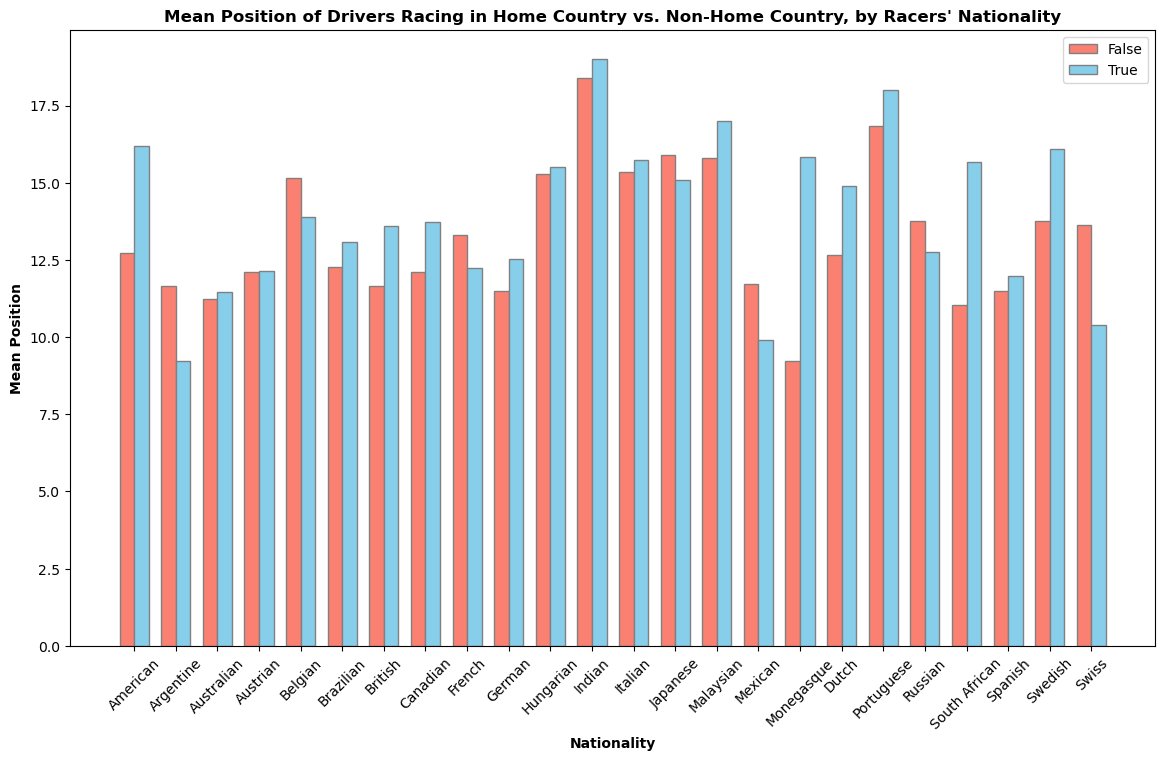

In [142]:
#grouped bar chart that shows the mean position for each nationality
nationalities = df_results_pivot['nationality']
true_values = df_results_pivot[True]
false_values = df_results_pivot[False]

bar_width = 0.35

r1 = np.arange(len(nationalities))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(14, 8))
plt.bar(r1, false_values, color='salmon', width=bar_width, edgecolor='grey', label='False')
plt.bar(r2, true_values, color='skyblue', width=bar_width, edgecolor='grey', label='True')

plt.xlabel('Nationality', fontweight='bold')
plt.ylabel('Mean Position', fontweight='bold')
plt.title("Mean Position of Drivers Racing in Home Country vs. Non-Home Country, by Racers' Nationality", fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(nationalities))], nationalities, rotation=45)
plt.legend()

plt.show()

<font size = '5'>Discussion</font>

After conducting our analysis, we found that on average, whether or not the race occurs in the driver's home country does not have an effect on their final position. The average positioning for a race occuring outside of a driver's home country is actually slightly higher than one within their home country.
In the future, we could run a similar analysis on a select assortment of racers (like top 10 in the world) to see if there is a difference within this subset of the 'drivers' dataset.
